In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [87]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [8]:
df = pd.read_csv("Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [19]:
#shape
df.shape

(6991, 41)

# Select your features (columns)

In [14]:
# Set features. This will also be used as your x values.
data_df = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [15]:
y = data_df["koi_disposition"]
X = data_df.drop("koi_disposition", axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [49]:
#Create train test solit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
X_train.shape

(5243, 40)

# Scaling the data using MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# K-Nearest Neighbors Algorithm (KNN)

k: 1, Train/Test Score: 1.000/0.781
k: 3, Train/Test Score: 0.901/0.804
k: 5, Train/Test Score: 0.876/0.816
k: 7, Train/Test Score: 0.868/0.816
k: 9, Train/Test Score: 0.861/0.818
k: 11, Train/Test Score: 0.856/0.820
k: 13, Train/Test Score: 0.853/0.826
k: 15, Train/Test Score: 0.847/0.819
k: 17, Train/Test Score: 0.842/0.820
k: 19, Train/Test Score: 0.841/0.822


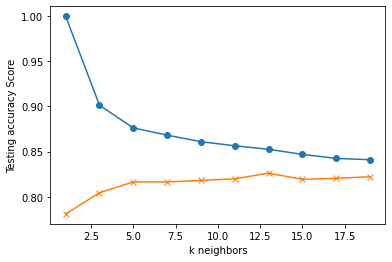

In [51]:
#KNN Model
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [81]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, verbose=3)

In [82]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

In [173]:
grid = GridSearchCV(pipe, param_grid, cv=4, scoring='accuracy')

In [178]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('knn',
                                        KNeighborsClassifier(n_neighbors=19))]),
             param_grid={'knn__n_neighbors': [2, 5, 15, 30, 45, 64]},
             scoring='accuracy')

In [179]:
print(grid.best_params_)
print(grid.best_score_)

{'knn__n_neighbors': 5}
0.8308222847194321


# Create a Deep Learning Model with Tensorflow

In [86]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [89]:
import tensorflow
X = data_df.drop("koi_disposition", axis=1)
y = data_df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [90]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [91]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [92]:
encoded_y_test

array([0, 2, 2, ..., 2, 1, 2])

In [93]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [96]:
y_train_categorical

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [164]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=40))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [166]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [167]:
#Model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_49 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_50 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 153       
Total params: 7,303
Trainable params: 7,303
Non-trainable params: 0
_________________________________________________________________


In [168]:
# Fit the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 2s - loss: 0.4815 - accuracy: 0.7994
Epoch 2/100
164/164 - 1s - loss: 0.3047 - accuracy: 0.8749
Epoch 3/100
164/164 - 1s - loss: 0.2780 - accuracy: 0.8846
Epoch 4/100
164/164 - 1s - loss: 0.2622 - accuracy: 0.8875
Epoch 5/100
164/164 - 1s - loss: 0.2535 - accuracy: 0.8961
Epoch 6/100
164/164 - 1s - loss: 0.2409 - accuracy: 0.8964
Epoch 7/100
164/164 - 1s - loss: 0.2359 - accuracy: 0.8980
Epoch 8/100
164/164 - 1s - loss: 0.2335 - accuracy: 0.9010
Epoch 9/100
164/164 - 1s - loss: 0.2289 - accuracy: 0.9031
Epoch 10/100
164/164 - 1s - loss: 0.2191 - accuracy: 0.9048
Epoch 11/100
164/164 - 1s - loss: 0.2183 - accuracy: 0.9075
Epoch 12/100
164/164 - 1s - loss: 0.2091 - accuracy: 0.9102
Epoch 13/100
164/164 - 1s - loss: 0.2043 - accuracy: 0.9111
Epoch 14/100
164/164 - 1s - loss: 0.2000 - accuracy: 0.9147
Epoch 15/100
164/164 - 1s - loss: 0.1981 - accuracy: 0.9146
Epoch 16/100
164/164 - 1s - loss: 0.1941 - accuracy: 0.9159
Epoch 17/100
164/164 - 1s - loss: 0.2023 - accura

# Quantify our Trained Model

In [169]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.7726 - accuracy: 0.8650
Normal Neural Network - Loss: 0.7726110816001892, Accuracy: 0.8649885654449463


# Make Predictions

In [144]:
encoded_predictions = model.predict_classes(X_test_scaled[:10])

/Users/stephenmilton/opt/anaconda3/envs/PyBank3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [145]:
encoded_predictions

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [146]:
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
prediction_labels

array(['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

In [147]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: ['CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'CONFIRMED']
Actual Labels: ['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE']


In [185]:
from numpy import array
final_result = pd.DataFrame({
    "Predicted classes": np.array(prediction_labels),
    "Actual Labels": y_test[:10]
})

In [186]:
final_result

,Predicted classes,Actual Labels
2058,CANDIDATE,CANDIDATE
6937,FALSE POSITIVE,FALSE POSITIVE
3771,FALSE POSITIVE,FALSE POSITIVE
367,FALSE POSITIVE,FALSE POSITIVE
4090,FALSE POSITIVE,FALSE POSITIVE
2791,FALSE POSITIVE,FALSE POSITIVE
6772,FALSE POSITIVE,FALSE POSITIVE
3304,FALSE POSITIVE,FALSE POSITIVE
4001,FALSE POSITIVE,FALSE POSITIVE
1034,CONFIRMED,CANDIDATE


NameError: name 'reload' is not defined

# Save the Model

In [195]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)

NameError: name 'your_model' is not defined